In [0]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
bank_data = pd.read_csv('/content/bank.csv')

In [29]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
bank_data.shape

(10000, 14)

In [31]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [32]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [0]:
#Drop the columns which are unique for all users like IDs
bank_data_new = bank_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1)

In [0]:
#splitting data into features and target variable
X = bank_data_new.iloc[:,:-1].values
y = bank_data_new.iloc[:,-1].values

In [35]:
bank_data_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelEncoder_X_1 = LabelEncoder()
X[:, 1]= labelEncoder_X_1.fit_transform(X[:, 1])

labelEncoder_X_2 = LabelEncoder()
X[:, 2] = labelEncoder_X_2.fit_transform(X[:, 2])

In [41]:
oneHotEncoder = OneHotEncoder(categorical_features = [1])
X = oneHotEncoder.fit_transform(X).toarray()
X = X[:, 1:]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
#splitting the dataset into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 7)

In [0]:
#feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [0]:
#Using sequential model using Keras
import keras
from keras.models import Sequential
from keras.layers import Dense

In [45]:
X_train.shape

(8000, 11)

In [46]:
#building ANN classifier

classifier = Sequential()

#adding first layer(input layer)
classifier.add(Dense(units=6, kernel_initializer='uniform', input_dim=11, 
                     activation='relu'))

#adding second layer(hidden layer)
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

#adding third layer(output layer)
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

#compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train the ANN
classifier.fit(X_train, y_train, batch_size=10, epochs=100)




Epoch 1/100





8000/8000 [==============================] - 2s 219us/step - loss: 0.4803 - acc: 0.7965
Epoch 2/100
8000/8000 [==============================] - 1s 111us/step - loss: 0.4273 - acc: 0.7967
Epoch 3/100
8000/8000 [==============================] - 1s 108us/step - loss: 0.4207 - acc: 0.8036
Epoch 4/100
8000/8000 [==============================] - 1s 110us/step - loss: 0.4165 - acc: 0.8251
Epoch 5/100
8000/8000 [==============================] - 1s 110us/step - loss: 0.4142 - acc: 0.8292
Epoch 6/100
8000/8000 [==============================] - 1s 112us/step - loss: 0.4121 - acc: 0.8337
Epoch 7/100
8000/8000 [==============================] - 1s 110us/step - loss: 0.4104 - acc: 0.8330
Epoch 8/100
8000/8000 [==============================] - 1s 111us/step - loss: 0.4094 - acc: 0.8350
Epoch 9/100
8000/8000 [==============================] - 1s 108us/step - loss: 0.4085 - acc: 0.8362
Epoch 10/100
8000/8000 [==============================] - 1s 116us/step - loss: 0.4073 - acc

In [0]:
#Learning Rate Optimization
#building ANN classifier

def create_model():
  model = Sequential()

  #adding first layer(input layer)
  model.add(Dense(units=6, kernel_initializer='uniform', input_dim=11, 
                     activation='relu'))

  #adding second layer(hidden layer)
  model.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

  #adding third layer(output layer)
  model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
  return model


In [0]:
def run_model(model, lr):
    model.summary()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=10, epochs=10)
    loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)
    print("learning rate" , lr)
    plt.plot(history.history['acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()
    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
8000/8000 [==============================] - 1s 181us/step - loss: 0.4818 - acc: 0.7967
Epoch 2/10
8000/8000 [==============================] - 1s 115us/step - loss: 0.4280 - acc: 0.7967
Epoch 3/10
8000/8000 [==============================] - 1s 123us/step - loss: 0.4219 - acc: 0.8004
Epoch 4/10
8000/8000 [==============================] - 1s 128us/step - loss: 0.4172 - ac

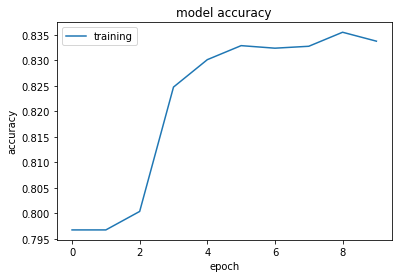


Test loss: 0.41
Test accuracy: 0.835
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
8000/8000 [==============================] - 2s 191us/step - loss: 0.4061 - acc: 0.8362
Epoch 2/10
8000/8000 [==============================] - 1s 119us/step - loss: 0.4056 - acc: 0.8350
Epoch 3/10
8000/8000 [==============================] - 1s 116us/step - loss: 0.4057 - acc: 0.8341
Epoch 4/10
8000/8000 [=============================

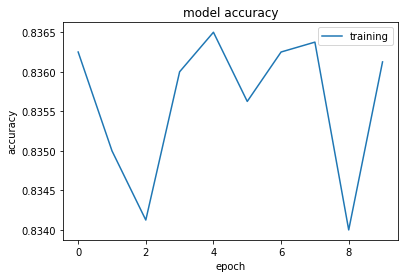


Test loss: 0.407
Test accuracy: 0.835
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
8000/8000 [==============================] - 1s 181us/step - loss: 0.4020 - acc: 0.8355
Epoch 2/10
8000/8000 [==============================] - 1s 116us/step - loss: 0.4026 - acc: 0.8356
Epoch 3/10
8000/8000 [==============================] - 1s 113us/step - loss: 0.4018 - acc: 0.8354
Epoch 4/10
8000/8000 [============================

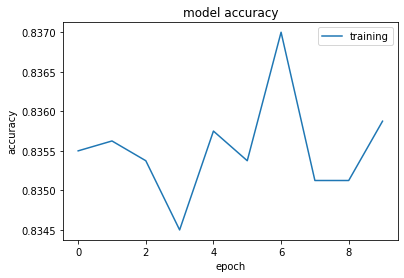


Test loss: 0.405
Test accuracy: 0.837
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
8000/8000 [==============================] - 2s 210us/step - loss: 0.4017 - acc: 0.8352
Epoch 2/10
8000/8000 [==============================] - 1s 118us/step - loss: 0.4012 - acc: 0.8352
Epoch 3/10
8000/8000 [==============================] - 1s 115us/step - loss: 0.4008 - acc: 0.8357
Epoch 4/10
8000/8000 [============================

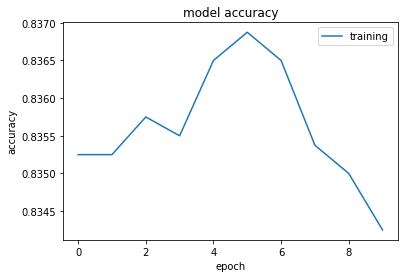


Test loss: 0.404
Test accuracy: 0.835
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
8000/8000 [==============================] - 2s 226us/step - loss: 0.4006 - acc: 0.8351
Epoch 2/10
8000/8000 [==============================] - 1s 117us/step - loss: 0.4005 - acc: 0.8356
Epoch 3/10
8000/8000 [==============================] - 1s 119us/step - loss: 0.4000 - acc: 0.8335
Epoch 4/10
8000/8000 [============================

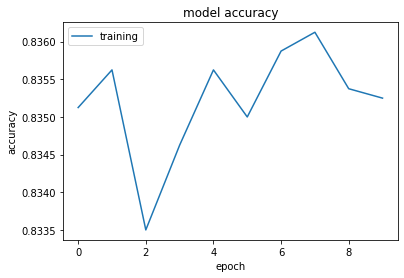


Test loss: 0.403
Test accuracy: 0.836


In [63]:
import matplotlib.pyplot as plt
model = create_model()
for lr in np.arange(0.01, 0.06 , 0.01):
    run_model(model , lr)

In [70]:
from keras import optimizers
#building ANN classifier

classifier = Sequential()

#adding first layer(input layer)
classifier.add(Dense(units=6, kernel_initializer='uniform', input_dim=11, 
                     activation='relu'))

#adding second layer(hidden layer)
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

#adding third layer(output layer)
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

#compiling the ANN
opt = optimizers.Adam(lr=0.03, amsgrad=False)
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#train the ANN
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
8000/8000 [==============================] - 2s 285us/step - loss: 0.4316 - acc: 0.8136
Epoch 2/100
8000/8000 [==============================] - 1s 126us/step - loss: 0.3764 - acc: 0.8537
Epoch 3/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.3666 - acc: 0.8580
Epoch 4/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.3623 - acc: 0.8554
Epoch 5/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.3622 - acc: 0.8554
Epoch 6/100
8000/8000 [==============================] - 1s 120us/step - loss: 0.3603 - acc: 0.8585
Epoch 7/100
8000/8000 [==============================] - 1s 118us/step - loss: 0.3630 - acc: 0.8554
Epoch 8/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.3586 - acc: 0.8569
Epoch 9/100
8000/8000 [==============================] - 1s 126us/step - loss: 0.3605 - acc: 0.8567
Epoch 10/100
8000/8000 [==============================] - 1s 126us/step - loss: 0.3583 - acc: 0.8590

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
y_pred = (y_pred > 0.5)

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1508   81]
 [ 201  210]]


In [74]:
#accuracy
print ((1508 + 210)/2000)

0.859
